# Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pickle

# Pre training

In [11]:
df_original = pd.read_csv('data.csv')
data = df_original.copy()

data
#data.shape

,497,261,2
0,1021,535,1
1,394,779,2
2,370,198,1
3,538,396,1
4,624,877,2
...,...,...,...
3565,882,663,1
3566,564,833,1
3567,391,253,1
3568,179,589,2


In [12]:
df = data.rename(columns={'497': 'Coluna1', '261': 'Coluna2', '2': 'Target'})
df

,Coluna1,Coluna2,Target
0,1021,535,1
1,394,779,2
2,370,198,1
3,538,396,1
4,624,877,2
...,...,...,...
3565,882,663,1
3566,564,833,1
3567,391,253,1
3568,179,589,2


In [13]:
df.isnull().sum()

Coluna1    0
Coluna2    0
Target     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Coluna1  3570 non-null   int64
 1   Coluna2  3570 non-null   int64
 2   Target   3570 non-null   int64
dtypes: int64(3)
memory usage: 83.8 KB


# Visualization

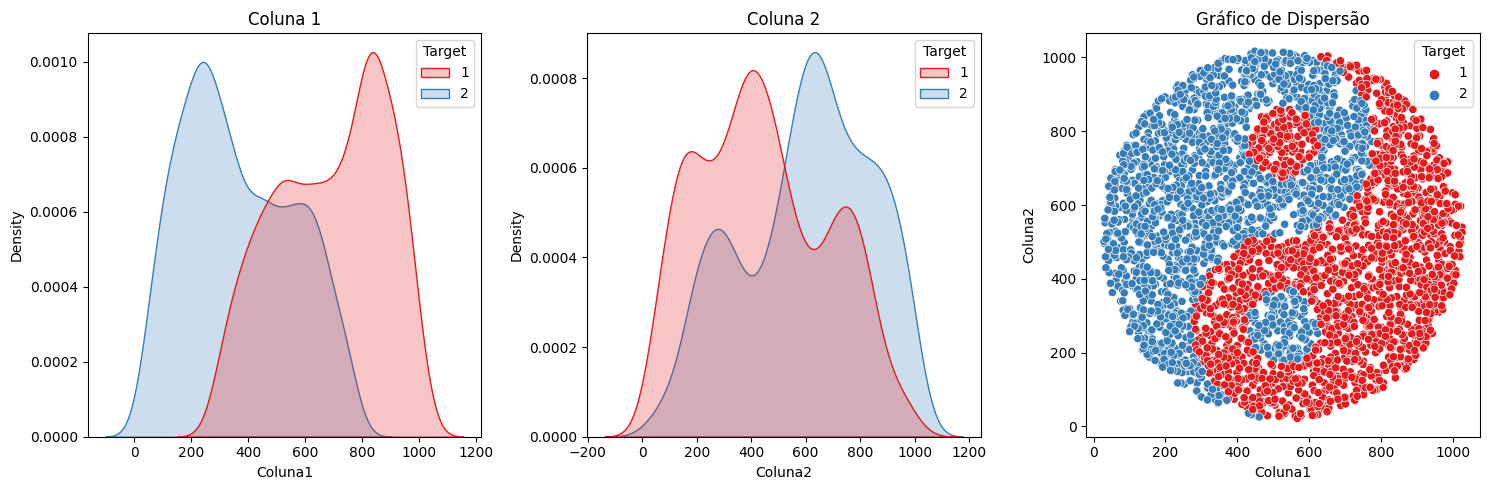

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x='Coluna1', hue='Target', fill=True, palette='Set1')
plt.title('Coluna 1')

plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='Coluna2', hue='Target', fill=True, palette='Set1')
plt.title('Coluna 2')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Coluna1', y='Coluna2', hue='Target', palette='Set1')

plt.title('Gráfico de Dispersão')

#plt.savefig('graficosyingyang.png')
plt.tight_layout()
plt.show()

Aqui o naive bayes chora, provavelmente :)

In [16]:
X = df[['Coluna1', 'Coluna2']]
y = df['Target']
count = y.value_counts()
count

Target
1    1792
2    1778
Name: count, dtype: int64

# Classifiers and Metrics

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Random Forests
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#SVM
svm_linear = svm.SVC(C=1.0, kernel='linear')
svm_linear = svm_linear.fit(X_train,y_train)

svm_poly = svm.SVC(C=1.0, kernel='poly')
svm_poly = svm_poly.fit(X_train,y_train)

svm_rbf = svm.SVC(C=1.0, kernel='rbf')
svm_rbf = svm_rbf.fit(X_train,y_train)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predicts
y_rf_pred = rf_model.predict(X_test)
y_nb_pred = nb_model.predict(X_test)
y_svm_predict_linear = svm_linear.predict(X_test)
y_svm_predict_poly = svm_poly.predict(X_test)
y_svm_predict_rbf = svm_rbf.predict(X_test)

metrics_rf = {
    'Acurácia (RF)': accuracy_score(y_test, y_rf_pred),
    'Recall (RF)': recall_score(y_test, y_rf_pred), #average='weighted'),
    'F1-Score (RF)': f1_score(y_test, y_rf_pred),
    'Precisão (RF)': precision_score(y_test, y_rf_pred)
    
}

metrics_nb = {
    'Acurácia (NB)': accuracy_score(y_test, y_nb_pred),
    'Recall (NB)': recall_score(y_test, y_nb_pred),
    'F1-Score (NB)': f1_score(y_test, y_nb_pred),
    'Precisão (NB)': precision_score(y_test, y_nb_pred)
}

metricas_SVMlinear  = {
    'Acc SVM Linear': accuracy_score(y_test, y_svm_predict_linear),
    'Precisao SVM Linear': precision_score(y_test, y_svm_predict_linear),
    'Recall SVM Linear': recall_score(y_test, y_svm_predict_linear),
    'F1 SVM Linear': f1_score(y_test, y_svm_predict_linear)
}

metricas_SVMpoly  = {
    'Acc SVM polinomial': accuracy_score(y_test, y_svm_predict_poly),
    'Precisao SVM polinomial': precision_score(y_test, y_svm_predict_poly),
    'Recall SVM polinomial': recall_score(y_test, y_svm_predict_poly),
    'F1 SVM polinomial': f1_score(y_test, y_svm_predict_poly)
}

metricas_SVMrbf  = {
    'Acc SVM rbf': accuracy_score(y_test, y_svm_predict_rbf),
    'Precisao SVM rbf': precision_score(y_test, y_svm_predict_rbf),
    'Recall SVM rbf': recall_score(y_test, y_svm_predict_rbf),
    'F1 SVM rbf': f1_score(y_test, y_svm_predict_rbf)
}

print("======== Random Forests ========")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value}")


print("\n========= Naive Bayes ==========")
for metric, value in metrics_nb.items():
    print(f"{metric}: {value}")

print("\n========= SVM Linear ==========")
for metric, value in metricas_SVMlinear.items():
    print(f"{metric}: {value}")

print("\n========= SVM Polinomial ==========")
for metric, value in metricas_SVMpoly.items():
    print(f"{metric}: {value}")

print("\n========= SVM Base Radial ==========")
for metric, value in metricas_SVMrbf.items():
    print(f"{metric}: {value}")

======== Random Forests ========
Acurácia (RF): 0.9866946778711485
Recall (RF): 0.9874476987447699
F1-Score (RF): 0.9867595818815331
Precisão (RF): 0.9860724233983287

========= Naive Bayes ==========
Acurácia (NB): 0.792016806722689
Recall (NB): 0.793584379358438
F1-Score (NB): 0.7930313588850174
Precisão (NB): 0.7924791086350975

========= SVM Linear ==========
Acc SVM Linear: 0.8186274509803921
Precisao SVM Linear: 0.8119891008174387
Recall SVM Linear: 0.8312412831241283
F1 SVM Linear: 0.8215024121295658

========= SVM Polinomial ==========
Acc SVM polinomial: 0.8172268907563025
Precisao SVM polinomial: 0.8877551020408163
Recall SVM polinomial: 0.7280334728033473
F1 SVM polinomial: 0.8

========= SVM Base Radial ==========
Acc SVM rbf: 0.9033613445378151
Precisao SVM rbf: 0.9004149377593361
Recall SVM rbf: 0.9079497907949791
F1 SVM rbf: 0.9041666666666667


In [18]:
with open('RandomForests_yingyang_metrica.pkl', 'wb') as arquivo:
    pickle.dump(metrics_rf , arquivo)

with open('NaiveBayes_yingyang_metrica.pkl', 'wb') as arquivo:
    pickle.dump(metrics_nb , arquivo)


with open('SVMlinear_yingyang_metrica.pkl', 'wb') as arquivo:
    pickle.dump(metricas_SVMlinear , arquivo)

with open('SVMpoly_yingyang_metrica.pkl', 'wb') as arquivo:
    pickle.dump(metricas_SVMpoly , arquivo)

with open('SVMrbf_yingyang_metrica.pkl', 'wb') as arquivo:
    pickle.dump(metricas_SVMrbf , arquivo)